# **Estandarizacion**

In [24]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import pickle

import sys
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
sys.path.append("../../../")
from src import funciones_estandarizacion as fe

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
df = pd.read_pickle("../../../datos/cluster_0/df_nonulls_encoded_sinout.pkl").reset_index(drop=True)
print(df.shape)
df.head()

(23707, 18)


,Profit,Country,Market,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,190.9200,8.558976,13.554942,23.876477,6,0.0,133.06,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,45.9000,36.318853,17.081114,23.876477,6,0.0,132.73,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,503.7822,20.327050,20.327050,92.253159,6,0.0,131.71,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,87.8400,31.067106,24.238419,14.720744,6,0.0,128.32,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,213.6600,36.318853,17.081114,23.876477,6,0.0,127.81,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
pd.set_option("display.max_columns", None)
modelos_estand = ["standar", "robust", "minmax"]

df_sin_vr = df.copy()
df_sin_vr.drop(columns=["Profit"], inplace=True)

df_estand, dic_scaler = fe.estandarizacion(df_sin_vr, df_sin_vr.columns, modelos_estand)
df_estand.head()

df_estand["Profit"] = df["Profit"]

df_estand

,Country,Market,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Country_standar,Market_standar,Sub-Category_standar,Quantity_standar,Discount_standar,Shipping Cost_standar,Ship Mode_First Class_standar,Ship Mode_Same Day_standar,Ship Mode_Second Class_standar,Ship Mode_Standard Class_standar,Segment_Consumer_standar,Segment_Corporate_standar,Segment_Home Office_standar,Order Priority_Critical_standar,Order Priority_High_standar,Order Priority_Low_standar,Order Priority_Medium_standar,Country_robust,Market_robust,Sub-Category_robust,Quantity_robust,Discount_robust,Shipping Cost_robust,Ship Mode_First Class_robust,Ship Mode_Same Day_robust,Ship Mode_Second Class_robust,Ship Mode_Standard Class_robust,Segment_Consumer_robust,Segment_Corporate_robust,Segment_Home Office_robust,Order Priority_Critical_robust,Order Priority_High_robust,Order Priority_Low_robust,Order Priority_Medium_robust,Country_minmax,Market_minmax,Sub-Category_minmax,Quantity_minmax,Discount_minmax,Shipping Cost_minmax,Ship Mode_First Class_minmax,Ship Mode_Same Day_minmax,Ship Mode_Second Class_minmax,Ship Mode_Standard Class_minmax,Segment_Consumer_minmax,Segment_Corporate_minmax,Segment_Home Office_minmax,Order Priority_Critical_minmax,Order Priority_High_minmax,Order Priority_Low_minmax,Order Priority_Medium_minmax,Profit
0,8.558976,13.554942,23.876477,6,0.0,133.06,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.557717,-1.349419,0.335066,1.176324,-0.654502,8.692719,-0.409603,-0.232823,-0.499183,0.807286,0.963341,-0.652544,-0.472783,-0.282401,1.531539,-0.224136,-1.173710,-1.254560,-0.946181,1.321801,1.000000,0.0,14.502818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.699229,0.000000,0.217005,0.384615,0.000,1.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,190.9200
1,36.318853,17.081114,23.876477,6,0.0,132.73,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.928608,-0.463533,0.335066,1.176324,-0.654502,8.669500,-0.409603,-0.232823,2.003275,-1.238719,-1.038054,1.532464,-0.472783,-0.282401,1.531539,-0.224136,-1.173710,1.704839,-0.453514,1.321801,1.000000,0.0,14.465614,0.0,0.0,1.0,-1.0,-1.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.875499,0.330058,0.217005,0.384615,0.000,0.997520,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,45.9000
2,20.327050,20.327050,92.253159,6,0.0,131.71,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.072372,0.351948,4.256218,1.176324,-0.654502,8.597733,-0.409603,-0.232823,-0.499183,0.807286,-1.038054,1.532464,-0.472783,-0.282401,-0.652938,-0.224136,0.851999,0.000000,0.000000,10.307980,1.000000,0.0,14.350620,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.773955,0.633886,1.000000,0.384615,0.000,0.989854,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,503.7822
3,31.067106,24.238419,14.720744,6,0.0,128.32,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.647418,1.334608,-0.189981,1.176324,-0.654502,8.359213,-0.409603,4.295103,-0.499183,-1.238719,-1.038054,-0.652544,2.115134,3.541062,-0.652938,-0.224136,-1.173710,1.144966,0.546486,0.118540,1.000000,0.0,13.968433,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.842152,1.000000,0.112161,0.384615,0.000,0.964377,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,87.8400
4,36.318853,17.081114,23.876477,6,0.0,127.81,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.928608,-0.463533,0.335066,1.176324,-0.654502,8.323330,-0.409603,-0.232823,-0.499183,0.807286,0.963341,-0.652544,-0.472783,-0.282401,1.531539,-0.224136,-1.173710,1.704839,-0.453514,1.321801,1.000000,0.0,13.910936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.875499,0.330058,0.217005,0.384615,0.000,0.960544,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,213.6600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

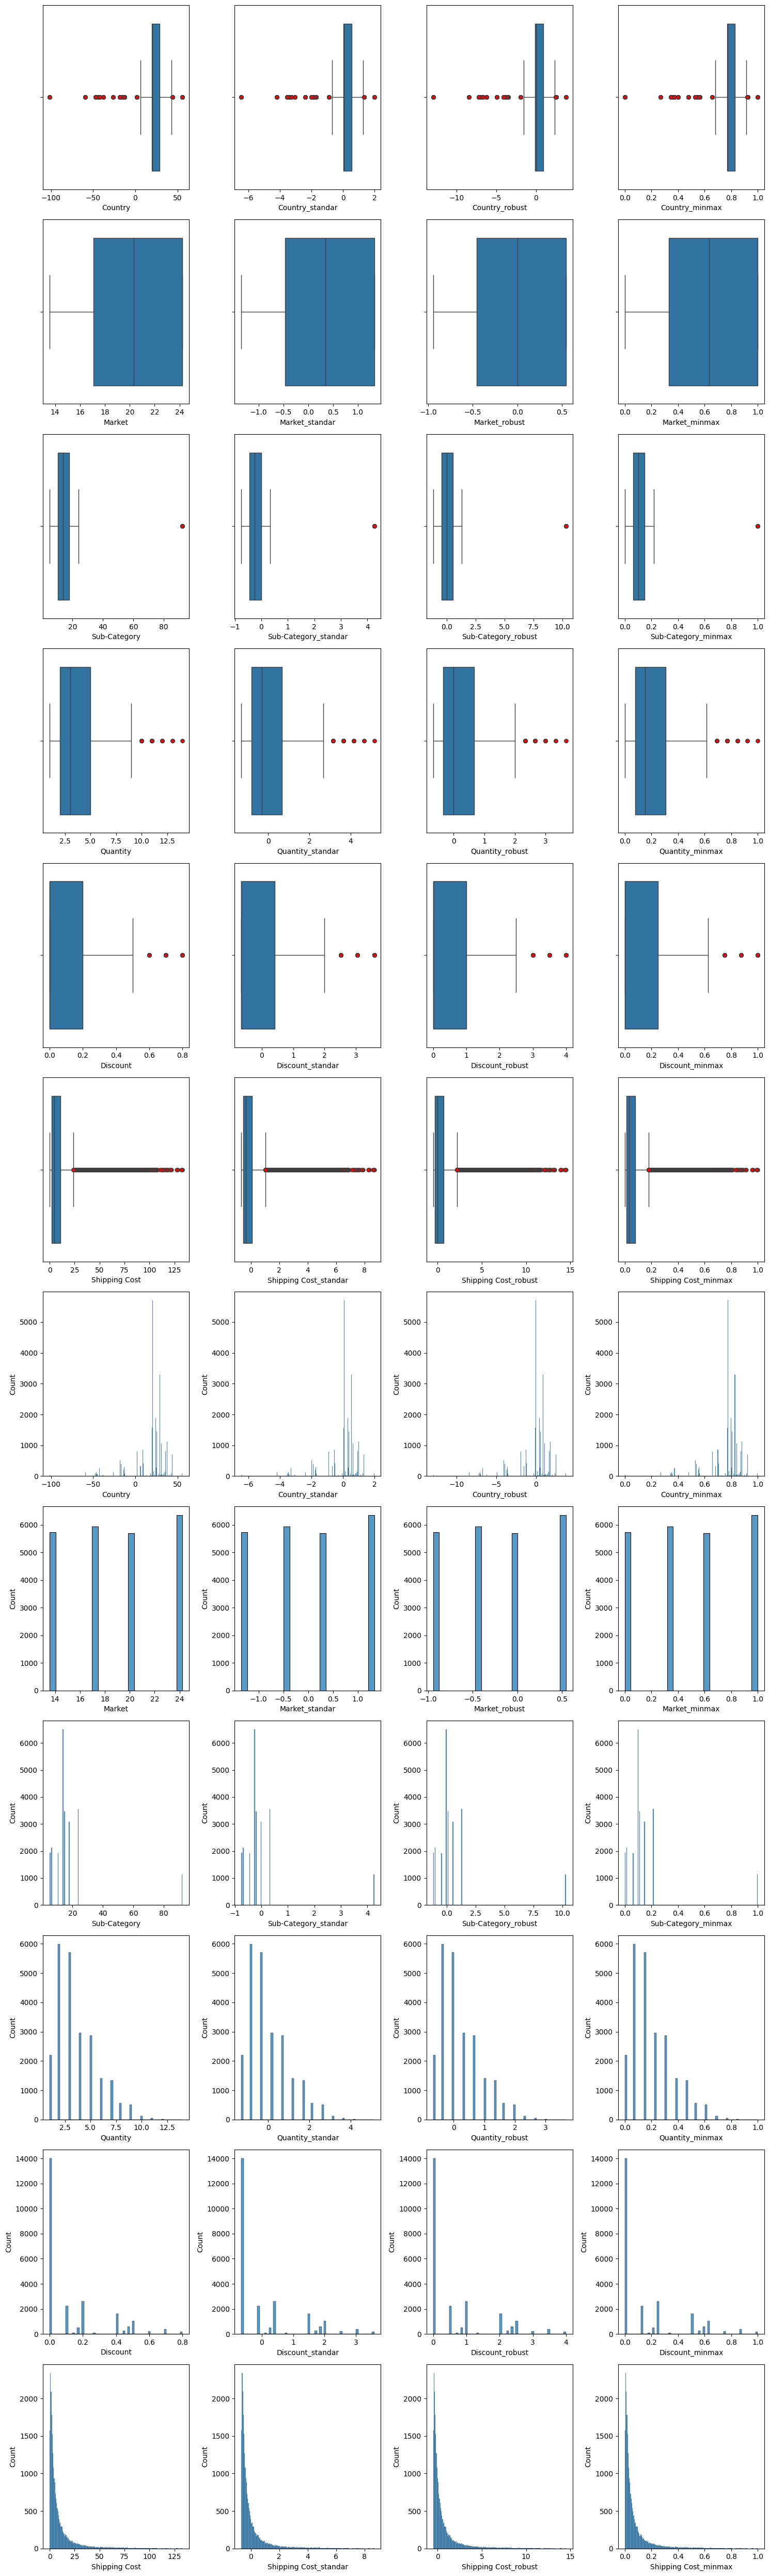

In [27]:
columnas = ['Country', 'Market', 'Sub-Category', 'Quantity', 'Discount','Shipping Cost']
fe.visualizacion_boxplot_hisplot_estand(df_estand, columnas, modelos_estand, figsize=(15,50))

En base a las distribuciones y conociendo los outliers vamos a optar como primera opción por un standar scaler.

In [28]:
scaler="robust"
vr = "Profit"

df_scaled = df_estand.loc[:, df_estand.columns.str.contains(f"{scaler}|{vr}", case=True)]

## Mover la columna de la variable respuesta al principio
df_scaled = df_scaled[[vr] + [col for col in df_scaled.columns if col != vr]]
df_scaled.columns = df_scaled.columns.str.replace(f"_{scaler}", "", regex=False)

df_scaled.head(2)

,Profit,Country,Market,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,190.92,-1.254560,-0.946181,1.321801,1.0,0.0,14.502818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0
1,45.90,1.704839,-0.453514,1.321801,1.0,0.0,14.465614,0.0,0.0,1.0,-1.0,-1.0,1.0,0.0,0.0,1.0,0.0,-1.0


Guardamos el scalres y el nuevo df:

In [29]:
with open('../../../datos/cluster_0/preprocesamiento/robust_scaler.pkl', 'wb') as f:
    pickle.dump(dic_scaler["robust"], f)

df_scaled.to_pickle("../../../datos/cluster_0/df_nonulls_encoded_sinout_scaled.pkl")